In [1]:
import torch as t
import cv2
from utilities.data_loader import CustomDataset, PatchCIFAR100
from torch.utils.data import DataLoader
from torchvision import transforms as T
from models.ResnetAE import ResnetAE
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
history_path = './history/history_resent_ae_l2_0001_cifar_100_8_augmented_test_job_0.csv'
loss_df = pd.read_csv(history_path)
loss = loss_df['Loss']#[0:90]
loss_df.head()

,Loss
0,0.004990
1,0.003309
2,0.004867
3,0.002371
4,0.001692


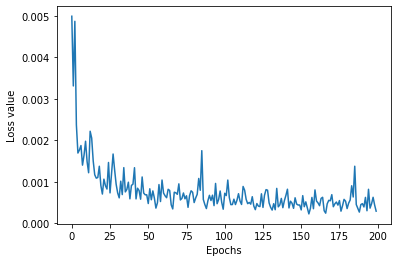

In [3]:
plt.figure(figsize=(6, 4))
plt.plot(list(range(0, len(loss))), loss)
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.show()

In [4]:
testing_data_path = '../data/testing_dataset/*.JPEG'
# result_path = './results/'
grid_size = 4

batch_size = 10
# learning_rate = 0.001
# epoch_num = 30
transforms = T.Compose(
            [T.ToPILImage(),
             T.ToTensor(),
             ])
cuda = True

In [8]:
# data = CustomDataset(path=testing_data_path, 
#                      transforms=transforms, 
#                      grid_size=grid_size)
# test_data = DataLoader(data, 
#                       batch_size=batch_size, 
#                       shuffle=False)
data = PatchCIFAR100(transforms=transforms, 
                     grid_size=grid_size,
                     root='data', train=False, 
                     )

test_data = DataLoader(data, 
                      batch_size=batch_size, 
                      shuffle=False)

print(len(test_data))

1000


In [9]:
epoch_num = 200
model = ResnetAE(in_channels=3, out_channels=64, flatten=True)
# criterion = t.nn.MSELoss()
# optimizer = t.optim.Adam(model.parameters(), lr=learning_rate)

ckp = t.load('ckpts/cifar_100/resnet_ae_l2_0001_8_augmneted_test_job/checkpoint_' + str(epoch_num) + '.ckp', 'cuda' if cuda else None)
model.load_state_dict(ckp['state_dict'])

Channels:  [16, 32, 64]
Flatten:  True


<All keys matched successfully>

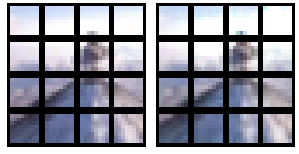

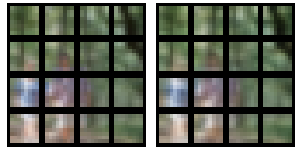

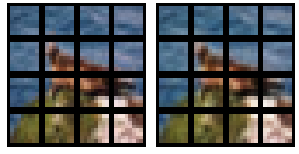

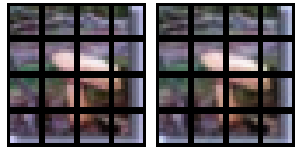

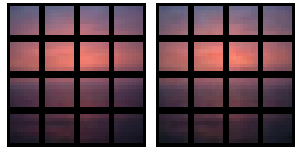

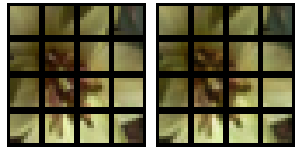

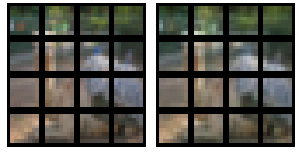

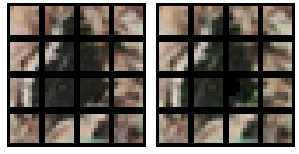

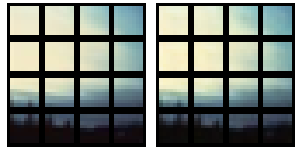

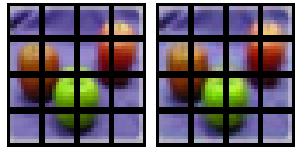

In [11]:
for img, target in test_data:
    target = target.resize_((target.shape[0]*target.shape[1], 
                                    target.shape[2], target.shape[3], target.shape[4]))
    result = model.forward(target).detach()
    result = result.reshape((batch_size, 16, 
                                        result.shape[1], result.shape[2], result.shape[3]))
    target = target.reshape((batch_size, 16, 
                                        result.shape[2], result.shape[3], result.shape[4]))
#     print(target.shape)
    for b in range(10):
        fig = plt.figure(constrained_layout=True, figsize=(4, 2))
        subfigs = fig.subfigures(1, 2, wspace=0.07)

        axsLeft = subfigs[0].subplots(4, 4, sharey=True)
        subfigs[0].set_facecolor('k')

    
        m=0
        for i in range(4):
            for j in range(4):

                axsLeft[i, j].imshow(target[b, m].numpy().transpose(1, 2, 0))
                axsLeft[i, j].axis('off')
                m+=1
            
        axsRight = subfigs[1].subplots(4, 4, sharey=True)
        subfigs[1].set_facecolor('k')
        m=0
        for i in range(4):
            for j in range(4):
                
                axsRight[i, j].imshow(result[b, m].numpy().transpose(1, 2, 0))
                axsRight[i, j].axis('off')
                m+=1
        plt.show()
        
    break